## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = '/data/submit/cms/store/user/lavezzo/SUEP/inference7_SUEPtracks/SUEP-m125-generic-htcut+RunIIAutumn18-private+MINIAODSIM/merged/SUEP-m125-generic-htcut+RunIIAutumn18-private+MINIAODSIM_merged_0.hdf5'
event_vars, m = h5load(f,'vars')

In [4]:
event_vars

,ntracks_track_down,ngood_fastjets_track_down,SUEP_genMass_track_down,SUEP_genPt_track_down,SUEP_nconst_CL_track_down,SUEP_pt_avg_b_CL_track_down,SUEP_S1_CL_track_down,SUEP_pt_avg_CL_track_down,SUEP_pt_CL_track_down,SUEP_eta_CL_track_down,...,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL,single_l5_bPfcand_S1_SUEPtracks_GNN,SUEP_nconst_GNN,SUEP_S1_GNN,single_l5_bPfcand_S1_SUEPtracks_GNNInverted,ISR_nconst_GNNInverted,ISR_S1_GNNInverted
0,109,3,125.0,1264.0,60.0,1.285802,0.830324,12.805115,765.357360,0.991087,...,933.932195,-1.180170,1.739992,48.470210,0.042555,61.0,0.835337,1.924705e-07,13.0,0.083445
1,176,3,125.0,656.0,73.0,0.946717,0.681030,4.920858,355.111293,-0.732908,...,447.791084,-0.487528,-2.669687,189.096960,0.311403,73.0,0.681030,2.166610e-03,56.0,0.395917
2,78,2,125.0,564.0,39.0,1.270402,0.736133,7.610663,293.992675,1.147037,...,201.330099,1.590123,-1.240081,44.506458,0.002049,40.0,0.725259,4.231962e-04,28.0,0.585079
3,126,2,125.0,1072.0,73.0,0.969989,0.792341,7.768300,564.353362,-0.724695,...,451.675503,-0.592345,-1.190526,113.675005,0.995982,75.0,0.793674,2.447815e-03,40.0,0.387132
4,102,2,125.0,888.0,67.0,1.023834,0.845563,9.415435,627.964507,-0.095608,...,447.048890,-0.373342,2.448121,45.053852,0.157023,67.0,0.845563,7.450575e-06,17.0,0.209133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,100,2,125.0,470.0,65.0,0.929816,0.857044,3.944591,249.407837,-0.068178,...,283.878565,-0.203309,-1.677892,26.953821,0.807580,66.0,0.857388,1.624409e-04,12.0,0.097539
25,96,2,125.0,508.0,62.0,1.155828,0.818397,4.715270,286.192363,-1.328790,...,234.467675,1.012421,1.326804,165.030978,0.117918,63.0,0.823164,8.067985e-05,24.0,0.239443
26,142,3,125.0,664.0,61.0,2.077783,0.142498,6.253298,373.200007,-0.159825,...,222.151675,-0.670693,-0.694529,75.985334,0.107885,63.0,0.144377,2.029971e-03,25.0,0.193718
27,133,2,125.0,640.0,67.0,1.603556,0.373054,10.302590,682.382314,0.486514,...,365.485271,-0.306003,2.830647,166.659268,0.762138,68.0,0.381179,1.483495e-03,47.0,0.252955


In [5]:
for key in event_vars:
    if "gen" not in key: continue
    print(key)

SUEP_genMass_track_down
SUEP_genPt_track_down
SUEP_delta_mass_genMass_CL_track_down
SUEP_delta_pt_genPt_CL_track_down
SUEP_genMass
SUEP_genPt
SUEP_delta_mass_genMass_CL
SUEP_delta_pt_genPt_CL


In [6]:
event_vars['SUEP_genPt']

0     1264.0
1      656.0
2      564.0
3     1072.0
4      888.0
       ...  
24     470.0
25     508.0
26     664.0
27     640.0
28     429.0
Name: SUEP_genPt, Length: 10677, dtype: float64

In [7]:
gen_pt = event_vars['SUEP_genPt']

(array([1.950e+02, 1.785e+03, 6.313e+03, 1.741e+03, 4.350e+02, 1.380e+02,
        4.900e+01, 1.300e+01, 7.000e+00, 1.000e+00]),
 array([  25.5625 ,  263.80625,  502.05   ,  740.29375,  978.5375 ,
        1216.78125, 1455.025  , 1693.26875, 1931.5125 , 2169.75625,
        2408.     ]),
 <BarContainer object of 10 artists>)

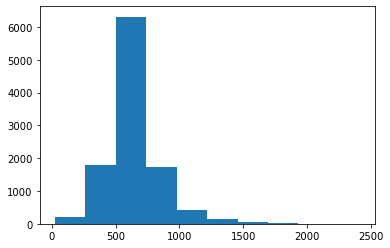

In [8]:
plt.hist(gen_pt)

In [9]:
Higgs_bins = np.array([   0,  400,  450,  500,  550,  600,  650,  700,  750,  800,  850,
        900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1500])
Higgs_factor = np.array([1.25, 1.25, 1.25, 1.25, 1.25, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24,
       1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24])
up_factor   = np.array([1.092, 1.092, 1.089, 1.088, 1.088, 1.087, 1.087, 1.087, 1.087,
       1.087, 1.085, 1.086, 1.086, 1.086, 1.087, 1.087, 1.087, 1.086,
       1.086])
down_factor = np.array([0.88, 0.88, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88])
binc = np.array([ 0.5*(Higgs_bins[i]+Higgs_bins[i+1])for i in range(Higgs_bins.shape[0]-1)])

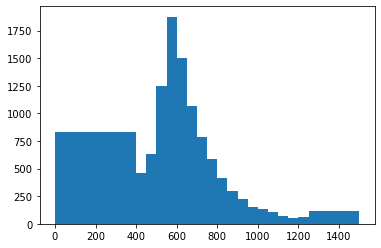

In [10]:
vals = plt.hist(gen_pt, bins=Higgs_bins)

In [11]:
freqs = vals[0]* Higgs_factor
ups   = freqs * up_factor
downs = freqs * down_factor

In [12]:
vals[0]

array([ 833.,  460.,  631., 1252., 1875., 1505., 1063.,  788.,  591.,
        413.,  296.,  221.,  148.,  135.,  103.,   74.,   55.,   62.,
        112.])

In [13]:
freqs

array([1041.25,  575.  ,  788.75, 1565.  , 2343.75, 1866.2 , 1318.12,
        977.12,  732.84,  512.12,  367.04,  274.04,  183.52,  167.4 ,
        127.72,   91.76,   68.2 ,   76.88,  138.88])

In [14]:
import mplhep as hep
import matplotlib
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'


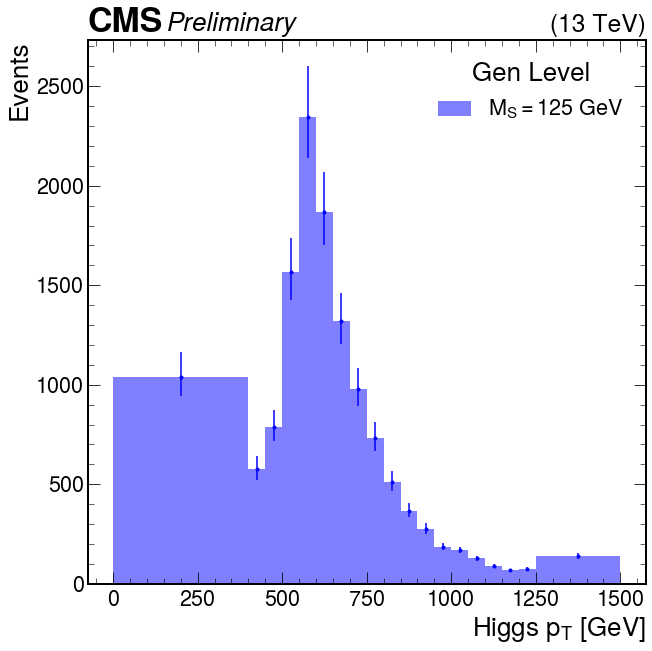

In [15]:
hep.cms.label(llabel='Preliminary',data=False)
plt.hist(binc, bins=vals[1], weights=freqs, color='blue', alpha=0.5)
plt.errorbar(binc, freqs, yerr=[ups-freqs,freqs-downs], fmt='b.' )
plt.xlabel(r"Higgs $p_{T}$ [GeV]")
plt.ylabel("Events")
plt.legend(title='Gen Level', labels=[r"$M_{S}=125$ GeV"])
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weighted.png")
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weighted.pdf")

In [16]:
start = vals[0].sum()
end = freqs.sum()
factor = start/end

In [17]:
factor

0.803369353922148

In [18]:
freqs = freqs * factor
ups = ups * factor
downs = downs * factor

In [19]:
freqs

array([ 836.50833977,  461.93737851,  633.65757791, 1257.27303889,
       1882.89692326, 1499.24788829, 1058.93721279,  784.9882631 ,
        588.74119733,  411.42151353,  294.86868766,  220.15533775,
        147.43434383,  134.48402985,  102.60633388,   73.71717192,
         54.78978994,   61.76303593,  111.57193587])

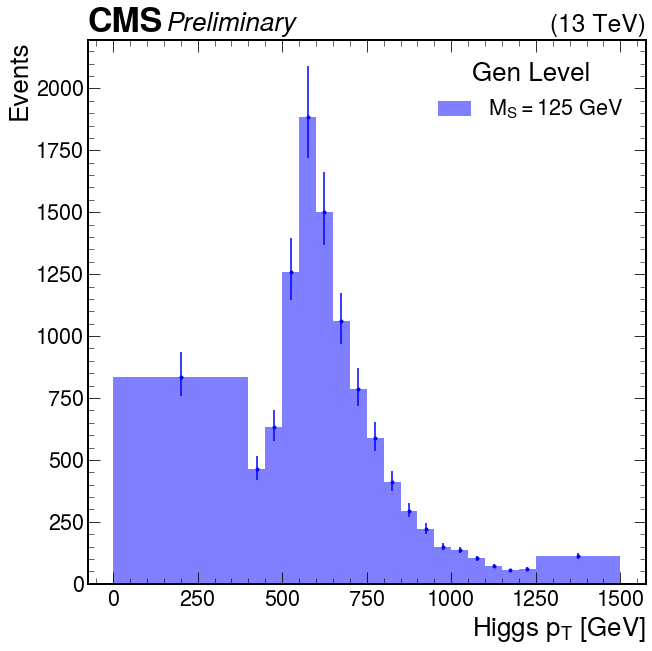

In [20]:
hep.cms.label(llabel='Preliminary',data=False)
plt.hist(binc, bins=vals[1], weights=freqs, color='blue', alpha=0.5)
plt.errorbar(binc, freqs, yerr=[ups-freqs,freqs-downs], fmt='b.' )
plt.xlabel(r"Higgs $p_{T}$ [GeV]")
plt.ylabel("Events")
plt.legend(title='Gen Level', labels=[r"$M_{S}=125$ GeV"])
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weighted_final.png")
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weighted_final.pdf")

In [21]:
weight = freqs / vals[0]
up_weights = ups / vals[0]
down_weights = downs / vals[0]

In [22]:
weight

array([1.00421169, 1.00421169, 1.00421169, 1.00421169, 1.00421169,
       0.996178  , 0.996178  , 0.996178  , 0.996178  , 0.996178  ,
       0.996178  , 0.996178  , 0.996178  , 0.996178  , 0.996178  ,
       0.996178  , 0.996178  , 0.996178  , 0.996178  ])

In [23]:
weights = np.divide( freqs, vals[0], out=np.ones_like(freqs), where=vals[0]!=0)

In [24]:
weights

array([1.00421169, 1.00421169, 1.00421169, 1.00421169, 1.00421169,
       0.996178  , 0.996178  , 0.996178  , 0.996178  , 0.996178  ,
       0.996178  , 0.996178  , 0.996178  , 0.996178  , 0.996178  ,
       0.996178  , 0.996178  , 0.996178  , 0.996178  ])

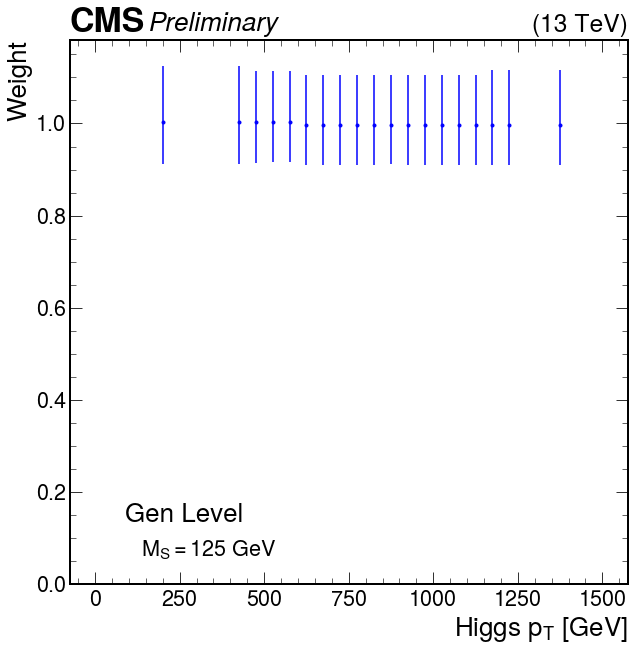

In [25]:
#plt.hist(binc, bins=vals[1], weights=weight)
#plt.hist(binc, bins=vals[1], weights=up_weights, fill=False)
#plt.hist(binc, bins=vals[1], weights=down_weights, fill=False)

hep.cms.label(llabel='Preliminary',data=False)
plt.hist(binc, bins=vals[1], weights=weight, color='blue', alpha=0.0)
plt.errorbar(binc, weight, yerr=[up_weights-weight,weight-down_weights], fmt='b.' )
plt.xlabel(r"Higgs $p_{T}$ [GeV]")
plt.ylabel("Weight")
plt.legend(title='Gen Level', labels=[r"$M_{S}=125$ GeV"])
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weights.png")
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_weights.pdf")

In [26]:
down_weights

array([0.88370629, 0.88370629, 0.89374841, 0.89374841, 0.89374841,
       0.88659842, 0.88659842, 0.88659842, 0.88659842, 0.88659842,
       0.88659842, 0.88659842, 0.88659842, 0.88659842, 0.88659842,
       0.88659842, 0.87663664, 0.87663664, 0.87663664])

In [62]:
og_up_factor   = np.array([1.44, 1.44, 1.45, 1.45, 1.45, 1.45, 1.46, 1.46, 1.46,
       1.46, 1.47, 1.47, 1.47, 1.47, 1.47, 1.48, 1.48, 1.48,
       1.48])
og_down_factor = np.array([0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.70, 0.70, 0.70, 0.70, 0.70,
       0.70, 0.70, 0.70, 0.70, 0.70, 0.70, 0.70, 0.69])
vals_up = vals[0] * og_up_factor
vals_down = vals[0] * og_down_factor

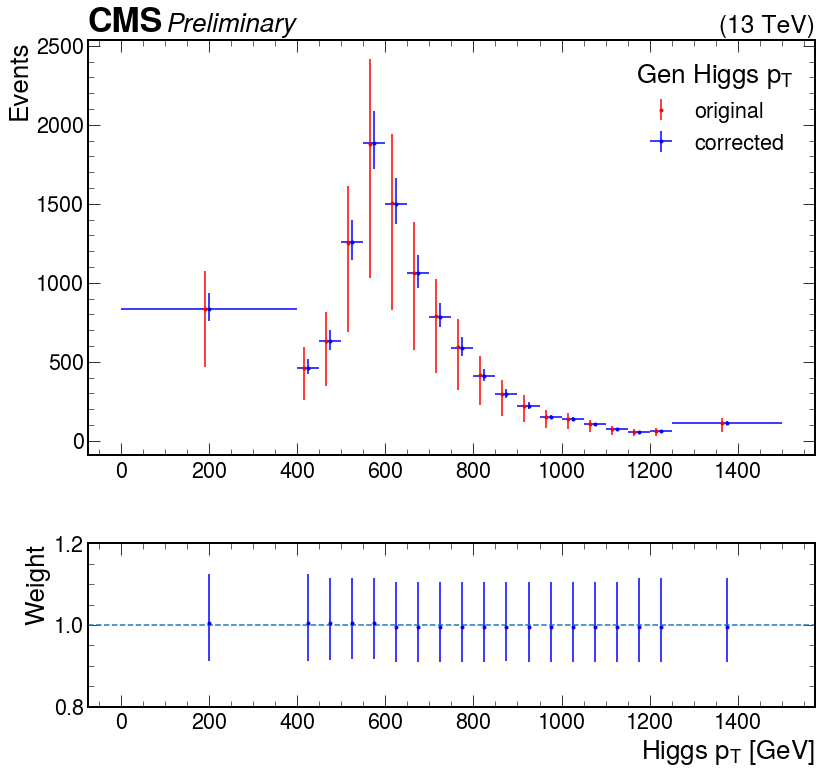

In [83]:
plt.figure(figsize=(12,14))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
hep.cms.label(llabel='Preliminary',data=False)
#ax1.hist(binc, bins=vals[1], weights=freqs, color='blue', fill=False)
#ax1.hist(binc, bins=vals[1], weights=vals[0], color='red', fill=False)
xerr = np.diff(vals[1])*0.5
ax1.errorbar(binc-10, vals[0], yerr=[vals_up-vals[0],vals[0]-vals_down], fmt='.', color='red')
ax1.errorbar(binc, freqs, xerr=xerr, yerr=[ups-freqs,freqs-downs], fmt='.', color='blue' )
#plt.xlabel(r"Higgs $p_{T}$ [GeV]")
ax1.set_ylabel("Events")
#ax1.set_yscale('log')
ax1.legend(title=r"Gen Higgs $p_{T}$",labels=[r"original",r"corrected"])
ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
ax2.hist(binc, bins=vals[1], weights=weight, color='blue', alpha=0.0)
ax2.errorbar(binc, weight, yerr=[up_weights-weight,weight-down_weights], fmt='b.' )
ax2.axhline(1,ls='--')
ax2.set_xlabel(r"Higgs $p_{T}$ [GeV]")
ax2.set_ylabel("Weight")
ax2.set_ylim(0.8,1.2)
plt.tight_layout()
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_comp.png")
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/Higgs_pt_comp.pdf")